# 🏠 New Zealand Airbnb ROI Analysis

## Introduction

This notebook analyzes **Return on Investment (ROI)** for Airbnb vacation rentals in New Zealand, focusing on Queenstown and Christchurch. These cities represent contrasting markets: Queenstown, a global tourism hotspot, and Christchurch, a stable urban center. Using data from the AirROI API, we explore key metrics like active listings, occupancy rates, average daily rates (ADR), revenue, and revenue-to-house-price ratios to guide property investors.

**Objectives**:
- Compare Airbnb performance between Queenstown and Christchurch over the last 12 months (August 2024–July 2025).
- Assess ROI potential by analyzing revenue relative to median house prices.
- Visualize trends to highlight seasonal and regional differences.

**Data Source**: AirROI API (see [documentation](https://www.airroi.com/api/documentation/#tag/Listings)). Median house prices are hardcoded based on estimates (Queenstown: NZD 1.85M, Christchurch: NZD 0.7M, sourced from REINZ, 2025).

**Requirements**:
- Python packages: `requests`, `pandas`, `matplotlib` (install via `pip install requests pandas matplotlib`).
- AirROI API key: Set as environment variable `AIRROI_API_KEY`.

---

## 1. Data Preparation

This section sets up the environment and fetches Airbnb metrics for Queenstown and Christchurch using the AirROI API.

- **Packages**: We use `requests` for API calls, `pandas` for data manipulation, and `matplotlib` for visualizations.
- **API Key**: Ensure `AIRROI_API_KEY` is set in your environment. Without it, data retrieval will fail.
- **Data**: The dataset includes metrics like active listings, occupancy, ADR, revenue, and RevPAR for both cities.

*Note*: The [AirROI API documentation](https://www.airroi.com/api/documentation/#tag/Listings) provides details on available endpoints and metrics.

---


In [3]:
import os, requests, pandas as pd, matplotlib.pyplot as plt

# Set pandas display options for concise output
pd.set_option('display.max_rows', 12)  # Limit DataFrame output to 12 rows

API_KEY = os.getenv("AIRROI_API_KEY")
headers = {"X-API-KEY": API_KEY}

if not API_KEY:
    print("⚠️ No API key found, please set environment variable AIRROI_API_KEY")


## 1.2 Get All Localities for New Zealand Three Major Cities (Auckland, Queenstown and Christchurch)

Here, we retrieve a list of Airbnb localities in New Zealand to confirm data availability for Queenstown (Otago) and Christchurch (Canterbury). This step ensures we target the correct regions for analysis.

- **Output**: A list of localities with active listing counts (e.g., Waitematā, Auckland: 2,329 listings).
- **Purpose**: Verify that Queenstown and Christchurch data is accessible before proceeding.
- *Tip*: For large outputs, we limit display to 12 rows using `pd.set_option('display.max_rows', 12)` to keep the notebook clean.

---

In [3]:
# Find Market locality for future use
all_localities = []

for city in ["Auckland", "Christchurch", "Queenstown"]:
    resp = requests.get(
        "https://api.airroi.com/markets/search",
        headers=headers,
        params={"query": city}
    )
    print(city, resp.json())
    
    data = resp.json()
    
    # add NZ locality into the list
    for item in data.get("entries", []):
        if item.get("country") == "New Zealand":
            all_localities.append({
                "city_query": city, 
                "country": item.get("country"),
                "region": item.get("region"),
                "locality": item.get("locality"),
                "district": item.get("district"),
                "active_listings": item.get("active_listings")
                
            })

nz_localities = pd.DataFrame(all_localities)
    
# Sort, region, locality
nz_localities = nz_localities.sort_values(by=["region", "locality"], ignore_index=True)

print(nz_localities)

df.to_csv("nz_city_localities.csv", index=False)
    

Auckland {'entries': [{'full_name': 'Waitematā, Auckland, New Zealand', 'country': 'New Zealand', 'region': 'Auckland', 'locality': 'Waitematā', 'district': '', 'native_currency': 'NZD', 'active_listings_count': 2329}, {'full_name': 'Auckland, Waitematā, Auckland, New Zealand', 'country': 'New Zealand', 'region': 'Auckland', 'locality': 'Waitematā', 'district': 'Auckland', 'native_currency': 'NZD', 'active_listings_count': 2328}, {'full_name': 'Auckland, Waitematā, Auckland, New Zealand', 'country': 'New Zealand', 'region': 'Auckland', 'locality': 'Waitematā', 'district': 'Auckland', 'native_currency': 'NZD', 'active_listings_count': 1135}, {'full_name': 'Waiheke, Auckland, New Zealand', 'country': 'New Zealand', 'region': 'Auckland', 'locality': 'Waiheke', 'district': '', 'native_currency': 'NZD', 'active_listings_count': 802}, {'full_name': 'Rodney, Auckland, New Zealand', 'country': 'New Zealand', 'region': 'Auckland', 'locality': 'Rodney', 'district': '', 'native_currency': 'NZD', 

Christchurch {'entries': [{'full_name': 'Christchurch, Canterbury, New Zealand', 'country': 'New Zealand', 'region': 'Canterbury', 'locality': 'Christchurch', 'district': '', 'native_currency': 'NZD', 'active_listings_count': 2649}, {'full_name': 'Linwood-Central-Heathcote Community, Christchurch, Canterbury, New Zealand', 'country': 'New Zealand', 'region': 'Canterbury', 'locality': 'Christchurch', 'district': 'Linwood-Central-Heathcote Community', 'native_currency': 'NZD', 'active_listings_count': 1249}, {'full_name': 'Linwood-Central-Heathcote Community, Christchurch, Canterbury, New Zealand', 'country': 'New Zealand', 'region': 'Canterbury', 'locality': 'Christchurch', 'district': 'Linwood-Central-Heathcote Community', 'native_currency': 'NZD', 'active_listings_count': 742}, {'full_name': 'Halswell-Hornby-Riccarton Community, Christchurch, Canterbury, New Zealand', 'country': 'New Zealand', 'region': 'Canterbury', 'locality': 'Christchurch', 'district': 'Halswell-Hornby-Riccarton C

Queenstown {'entries': [{'full_name': 'Queenstown, Otago, New Zealand', 'country': 'New Zealand', 'region': 'Otago', 'locality': 'Queenstown', 'district': '', 'native_currency': 'NZD', 'active_listings_count': 2719}, {'full_name': 'Boydtown, Queenstown, Otago, New Zealand', 'country': 'New Zealand', 'region': 'Otago', 'locality': 'Queenstown', 'district': 'Boydtown', 'native_currency': 'NZD', 'active_listings_count': 898}, {'full_name': 'Goldfield Heights, Queenstown, Otago, New Zealand', 'country': 'New Zealand', 'region': 'Otago', 'locality': 'Queenstown', 'district': 'Goldfield Heights', 'native_currency': 'NZD', 'active_listings_count': 415}, {'full_name': 'Fernhill, Queenstown, Otago, New Zealand', 'country': 'New Zealand', 'region': 'Otago', 'locality': 'Queenstown', 'district': 'Fernhill', 'native_currency': 'NZD', 'active_listings_count': 250}, {'full_name': 'Sunshine Bay, Queenstown, Otago, New Zealand', 'country': 'New Zealand', 'region': 'Otago', 'locality': 'Queenstown', 'd

## 2. Testing Queenstown as a Locality Endpoint

This section tests the AirROI API by fetching data for Queenstown as a single locality, leveraging its simpler regional classification compared to Auckland, which spans multiple localities (e.g., Waitematā, Waiheke). Using Queenstown simplifies data retrieval and serves as a focused test case for our Airbnb ROI analysis.

- **Objective**: Validate the AirROI API endpoint for Queenstown (Otago region) to ensure accurate data retrieval for metrics like active listings, occupancy, ADR, and revenue.
- **Why Queenstown?**:
  - Unlike Auckland, where multiple locality endpoints (e.g., Waitematā, Albert-Eden) complicate data aggregation, Queenstown is a single locality, making it ideal for testing.
  - Queenstown’s tourism-driven market provides rich data for ROI analysis.
- **Data Source**: AirROI API (`nz_airbnb_all_metrics.csv`), with Queenstown metrics covering July 2024–July 2025.
- **Next Steps**: Successful retrieval for Queenstown sets the stage for merging with Christchurch data and comparing ROI metrics (e.g., revenue-to-price ratio).
- **Note**: Ensure the API key (`AIRROI_API_KEY`) is set. See [AirROI documentation](https://www.airroi.com/api/documentation/#tag/Listings) for endpoint details.

---


In [5]:

market = {"country": "NZ", "region": "Otago", "locality": "Queenstown"}

resp = requests.post("https://api.airroi.com/markets/metrics/occupancy",
                     headers=headers,
                     json={"market": market, "num_months": 12, "currency": "native"})

data = resp.json()
data


{'market': {'country': 'New Zealand',
  'region': 'Otago',
  'locality': 'Queenstown',
  'district': None},
 'results': [{'date': '2024-08-01',
   'avg': 0.64,
   'p25': 0.47,
   'p50': 0.72,
   'p75': 0.85,
   'p90': 0.92},
  {'date': '2024-09-01',
   'avg': 0.55,
   'p25': 0.32,
   'p50': 0.59,
   'p75': 0.79,
   'p90': 0.9},
  {'date': '2024-10-01',
   'avg': 0.52,
   'p25': 0.26,
   'p50': 0.52,
   'p75': 0.76,
   'p90': 0.87},
  {'date': '2024-11-01',
   'avg': 0.54,
   'p25': 0.25,
   'p50': 0.6,
   'p75': 0.82,
   'p90': 0.9},
  {'date': '2024-12-01',
   'avg': 0.65,
   'p25': 0.45,
   'p50': 0.73,
   'p75': 0.87,
   'p90': 0.94},
  {'date': '2025-01-01',
   'avg': 0.68,
   'p25': 0.5,
   'p50': 0.77,
   'p75': 0.89,
   'p90': 0.94},
  {'date': '2025-02-01',
   'avg': 0.66,
   'p25': 0.47,
   'p50': 0.76,
   'p75': 0.88,
   'p90': 0.93},
  {'date': '2025-03-01',
   'avg': 0.6,
   'p25': 0.36,
   'p50': 0.67,
   'p75': 0.84,
   'p90': 0.92},
  {'date': '2025-04-01',
   'avg': 0.5

### Queenstown Occupancy Data

In [6]:

queenstown_occupancy = pd.DataFrame(data['results'])

# put location info into the table
for key, value in data['market'].items():
    queenstown_occupancy[key] = value

# change data time
queenstown_occupancy['date'] = pd.to_datetime(queenstown_occupancy['date'])

print(queenstown_occupancy.head())


        date   avg   p25   p50   p75   p90      country region    locality  \
0 2024-08-01  0.64  0.47  0.72  0.85  0.92  New Zealand  Otago  Queenstown   
1 2024-09-01  0.55  0.32  0.59  0.79  0.90  New Zealand  Otago  Queenstown   
2 2024-10-01  0.52  0.26  0.52  0.76  0.87  New Zealand  Otago  Queenstown   
3 2024-11-01  0.54  0.25  0.60  0.82  0.90  New Zealand  Otago  Queenstown   
4 2024-12-01  0.65  0.45  0.73  0.87  0.94  New Zealand  Otago  Queenstown   

  district  
0     None  
1     None  
2     None  
3     None  
4     None  


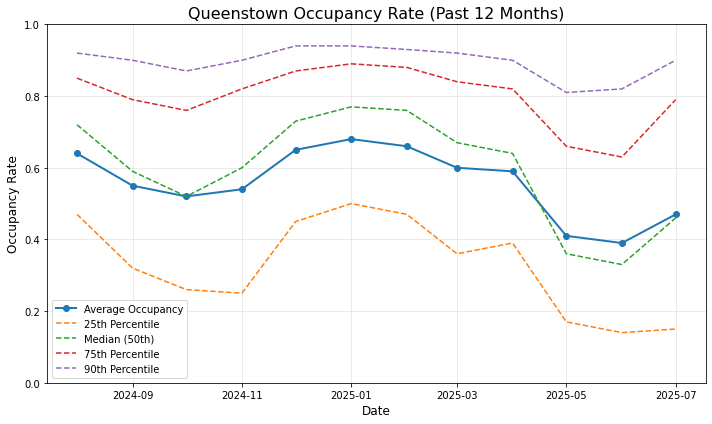

In [7]:
plt.figure(figsize=(10,6))

# Average Occupancy rate 
plt.plot(queenstown_occupancy['date'], queenstown_occupancy['avg'], 
         marker='o', label='Average Occupancy', linewidth=2)

# Each Percentile
plt.plot(queenstown_occupancy['date'], queenstown_occupancy['p25'], 
         linestyle='--', label='25th Percentile')
plt.plot(queenstown_occupancy['date'], queenstown_occupancy['p50'], 
         linestyle='--', label='Median (50th)')
plt.plot(queenstown_occupancy['date'], queenstown_occupancy['p75'], 
         linestyle='--', label='75th Percentile')
plt.plot(queenstown_occupancy['date'], queenstown_occupancy['p90'], 
         linestyle='--', label='90th Percentile')

plt.title("Queenstown Occupancy Rate (Past 12 Months)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Occupancy Rate", fontsize=12)
plt.ylim(0, 1)  # 占比 0-1
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## 3. Downloading Market Metrics Data for Queenstown and Christchurch

This section retrieves comprehensive Airbnb market metrics for Queenstown and Christchurch from the AirROI API, covering August 2024–July 2025. The data includes active listings, occupancy rates, average daily rates (ADR), revenue, RevPAR, and more, stored in `nz_airbnb_all_metrics.csv` for analysis.

- **Objective**: Fetch and consolidate market data for Queenstown (Otago) and Christchurch (Canterbury) to enable ROI comparisons.
- **Data Source**: AirROI API [](https://www.airroi.com/api/documentation/#tag/Listings), providing metrics like `active_listings_count`, `occupancy_avg`, `average_daily_rate_avg`, and `revenue_avg`.
- **Process**:
  - Query the AirROI API for each locality (Queenstown as a single endpoint, Christchurch as a single endpoint).
  - Save and merge data into a single CSV file for analysis.
- **Note**: Ensure the `AIRROI_API_KEY` environment variable is set. Update the dataset with fresh API calls for the latest data.
- **Output**: A consolidated dataset (`nz_airbnb_all_metrics.csv`) with monthly metrics for both cities, used in subsequent analyses (e.g., revenue-to-price ratio).

### 3.1 Queenstown

This subsection focuses on downloading market metrics specifically for Queenstown, a single locality in the Otago region, known for its tourism-driven Airbnb market.

- **Why Queenstown?**: Its single-locality classification simplifies API queries compared to multi-locality regions like Auckland. Queenstown’s high demand (e.g., 68% occupancy, NZD 13,392 revenue in January 2025) makes it a prime candidate for ROI analysis.
- **Endpoint**: AirROI API locality endpoint for Queenstown (`locality: Queenstown, region: Otago`).
- **Metrics Retrieved**: Includes `active_listings_count` (e.g., 2,613 in January 2025), `occupancy_avg`, `average_daily_rate_avg`, `revenue_avg`, and percentiles (p25, p50, p75, p90).
- **Purpose**: Validate data retrieval for Queenstown and prepare it for merging with Christchurch data.

---


In [24]:
MARKET = {
    "country": "New Zealand",
    "region": "Otago",
    "locality": "Queenstown"
}

NUM_MONTHS = 12

# 请求 All Metrics
resp = requests.post(
    "https://api.airroi.com/markets/metrics/all",
    headers=headers,
    json={
        "market": MARKET,
        "num_months": NUM_MONTHS,
        "currency": "native"
    }
)

queenstown_all_metrics = resp.json()

records = []

for item in queenstown_all_metrics['results']:
    record = {"date": item["date"]}
    for metric in ["occupancy", "average_daily_rate", "revpar", "revenue", "booking_lead_time", "length_of_stay"]:
        if metric in item:
            for k, v in item[metric].items():
                record[f"{metric}_{k}"] = v
    
    # active_listings_count
    record["active_listings_count"] = item.get("active_listings_count", None)
    
    records.append(record)

print(records[:5])

[{'date': '2024-08-01', 'occupancy_avg': 0.64, 'occupancy_p25': 0.47, 'occupancy_p50': 0.71, 'occupancy_p75': 0.85, 'occupancy_p90': 0.92, 'average_daily_rate_avg': 624.7, 'average_daily_rate_p25': 329.3, 'average_daily_rate_p50': 520.6, 'average_daily_rate_p75': 774.4, 'average_daily_rate_p90': 1158.2, 'revpar_avg': 396.3, 'revpar_p25': 167.5, 'revpar_p50': 332.4, 'revpar_p75': 525.9, 'revpar_p90': 780.6, 'revenue_avg': 12284.3, 'revenue_p25': 5191.4, 'revenue_p50': 10304.9, 'revenue_p75': 16301.7, 'revenue_p90': 24201.3, 'booking_lead_time_avg': 60.4, 'booking_lead_time_p25': 26.0, 'booking_lead_time_p50': 42.0, 'booking_lead_time_p75': 79.0, 'booking_lead_time_p90': 133.0, 'length_of_stay_avg': 3.8, 'length_of_stay_p25': 2.0, 'length_of_stay_p50': 3.0, 'length_of_stay_p75': 4.0, 'length_of_stay_p90': 7.0, 'active_listings_count': 2323}, {'date': '2024-09-01', 'occupancy_avg': 0.55, 'occupancy_p25': 0.32, 'occupancy_p50': 0.59, 'occupancy_p75': 0.79, 'occupancy_p90': 0.9, 'average_da

In [27]:
qt_allmetrics = pd.DataFrame(records)

for key, value in MARKET.items():
    qt_allmetrics[key] = value


qt_allmetrics['date'] = pd.to_datetime(qt_allmetrics['date'].str[:7], format="%Y-%m")


qt_allmetrics.to_csv("queenstown_all_metrics.csv", index=False)
print(qt_allmetrics.head())

        date  occupancy_avg  occupancy_p25  occupancy_p50  occupancy_p75  \
0 2024-08-01           0.64           0.47           0.71           0.85   
1 2024-09-01           0.55           0.32           0.59           0.79   
2 2024-10-01           0.52           0.26           0.53           0.76   
3 2024-11-01           0.54           0.25           0.59           0.82   
4 2024-12-01           0.65           0.46           0.73           0.87   

   occupancy_p90  average_daily_rate_avg  average_daily_rate_p25  \
0           0.92                   624.7                   329.3   
1           0.90                   552.6                   290.1   
2           0.88                   521.9                   273.6   
3           0.90                   569.9                   306.9   
4           0.94                   627.1                   338.2   

   average_daily_rate_p50  average_daily_rate_p75  ...  booking_lead_time_p90  \
0                   520.6                   774.4  ..

### 3.2 Christchurch

This subsection focuses on downloading market metrics for Christchurch, a single locality in the Canterbury region, known for its stable urban Airbnb market.

- **Why Christchurch?**: As a single-locality endpoint, Christchurch simplifies API queries, similar to Queenstown. Its consistent demand (e.g., 60% occupancy, NZD 4,129 revenue in January 2025) makes it a key comparison point for ROI analysis.
- **Endpoint**: AirROI API locality endpoint for Christchurch (`locality: Christchurch, region: Canterbury`).
- **Metrics Retrieved**: Includes `active_listings_count` (e.g., 2,466 in January 2025), `occupancy_avg`, `average_daily_rate_avg`, `revenue_avg`, and percentiles (p25, p50, p75, p90).
- **Purpose**: Validate data retrieval for Christchurch and prepare it for merging with Queenstown data to enable comparative ROI analysis.

---


In [3]:
MARKET = {
    "country": "New Zealand",
    "region": "Canterbury",
    "locality": "Christchurch"
}

NUM_MONTHS = 36


resp = requests.post(
    "https://api.airroi.com/markets/metrics/all",
    headers=headers,
    json={
        "market": MARKET,
        "num_months": NUM_MONTHS,
        "currency": "native"
    }
)

chch_all_metrics = resp.json()

records = []

for item in chch_all_metrics['results']:
    record = {"date": item["date"]}
    for metric in ["occupancy", "average_daily_rate", "revpar", "revenue", "booking_lead_time", "length_of_stay"]:
        if metric in item:
            for k, v in item[metric].items():
                record[f"{metric}_{k}"] = v
    
    # active_listings_count
    record["active_listings_count"] = item.get("active_listings_count", None)
    
    records.append(record)

print(records[:5])

[{'date': '2022-08-01', 'occupancy_avg': 0.63, 'occupancy_p25': 0.4, 'occupancy_p50': 0.71, 'occupancy_p75': 0.88, 'occupancy_p90': 0.94, 'average_daily_rate_avg': 160.6, 'average_daily_rate_p25': 85.7, 'average_daily_rate_p50': 129.3, 'average_daily_rate_p75': 187.9, 'average_daily_rate_p90': 288.8, 'revpar_avg': 125.0, 'revpar_p25': 56.7, 'revpar_p50': 96.0, 'revpar_p75': 151.2, 'revpar_p90': 246.7, 'revenue_avg': 3874.3, 'revenue_p25': 1753.3, 'revenue_p50': 2974.9, 'revenue_p75': 4685.5, 'revenue_p90': 7647.0, 'booking_lead_time_avg': 0.0, 'booking_lead_time_p25': 0.0, 'booking_lead_time_p50': 0.0, 'booking_lead_time_p75': 0.0, 'booking_lead_time_p90': 0.0, 'length_of_stay_avg': 0.0, 'length_of_stay_p25': 0.0, 'length_of_stay_p50': 0.0, 'length_of_stay_p75': 0.0, 'length_of_stay_p90': 0.0, 'active_listings_count': 1579}, {'date': '2022-09-01', 'occupancy_avg': 0.64, 'occupancy_p25': 0.41, 'occupancy_p50': 0.75, 'occupancy_p75': 0.87, 'occupancy_p90': 0.93, 'average_daily_rate_avg':

In [5]:
chch_allmetrics = pd.DataFrame(records)

for key, value in MARKET.items():
    chch_allmetrics[key] = value


chch_allmetrics['date'] = pd.to_datetime(chch_allmetrics['date'].str[:7], format="%Y-%m")


chch_allmetrics.to_csv("christchurch_all_metrics.csv", index=False)
print(chch_allmetrics.head())

        date  occupancy_avg  occupancy_p25  occupancy_p50  occupancy_p75  \
0 2022-08-01           0.63           0.40           0.71           0.88   
1 2022-09-01           0.64           0.41           0.75           0.87   
2 2022-10-01           0.69           0.49           0.82           0.92   
3 2022-11-01           0.72           0.54           0.85           0.93   
4 2022-12-01           0.73           0.61           0.85           0.94   

   occupancy_p90  average_daily_rate_avg  average_daily_rate_p25  \
0           0.94                   160.6                    85.7   
1           0.93                   162.0                    88.4   
2           0.97                   185.3                    97.0   
3           0.97                   191.3                   100.2   
4           0.97                   181.5                    93.0   

   average_daily_rate_p50  average_daily_rate_p75  ...  booking_lead_time_p90  \
0                   129.3                   187.9  ..

### 3.3 Concatenate Queenstown and Christchurch Data

In [10]:
queenstown_allmetrics = pd.read_csv("queenstown_all_metrics.csv")

chch_allmetrics = pd.read_csv("christchurch_all_metrics.csv")

combined = pd.concat([queenstown_allmetrics, chch_allmetrics], ignore_index=True)

combined.to_csv("nz_airbnb_all_metrics.csv", index=False)

In [4]:
qt_chch = pd.read_csv("nz_airbnb_all_metrics.csv")

qt_chch.head()

,date,occupancy_avg,occupancy_p25,occupancy_p50,occupancy_p75,occupancy_p90,average_daily_rate_avg,average_daily_rate_p25,average_daily_rate_p50,average_daily_rate_p75,...,booking_lead_time_p90,length_of_stay_avg,length_of_stay_p25,length_of_stay_p50,length_of_stay_p75,length_of_stay_p90,active_listings_count,country,region,locality
0,2024-08-01,0.64,0.47,0.71,0.85,0.92,624.7,329.3,520.6,774.4,...,133.0,3.8,2.0,3.0,4.0,7.0,2323,New Zealand,Otago,Queenstown
1,2024-09-01,0.55,0.32,0.59,0.79,0.90,552.6,290.1,453.3,676.6,...,117.0,3.6,2.0,3.0,4.0,6.0,2302,New Zealand,Otago,Queenstown
2,2024-10-01,0.52,0.26,0.53,0.76,0.88,521.9,273.6,420.9,632.9,...,120.0,4.0,2.0,3.0,4.0,7.0,2293,New Zealand,Otago,Queenstown
3,2024-11-01,0.54,0.25,0.59,0.82,0.90,569.9,306.9,476.3,696.5,...,144.0,5.0,2.0,3.0,4.0,9.0,2456,New Zealand,Otago,Queenstown
4,2024-12-01,0.65,0.46,0.73,0.87,0.94,627.1,338.2,532.5,771.8,...,170.0,4.5,2.0,3.0,5.0,8.0,2514,New Zealand,Otago,Queenstown


## 📊 4. Visualization

This section visualizes key Airbnb market metrics for Queenstown and Christchurch over the last 12 months (August 2024–July 2025) to compare their performance and inform investment decisions. The metrics include active listings count, occupancy rates, average daily rate (ADR), and revenue, sourced from `nz_airbnb_all_metrics.csv` via the AirROI API.

- **Objective**: Create clear, comparative visualizations to highlight trends and differences in Airbnb performance between Queenstown (tourism-driven) and Christchurch (urban, stable).
- **Data Source**: AirROI API [](https://www.airroi.com/api/documentation/#tag/Listings), with metrics like `active_listings_count`, `occupancy_avg`, `average_daily_rate_avg`, and `revenue_avg`.
- **Methodology**:
  - Use pivoted data from `nz_airbnb_all_metrics.csv` to plot time-series trends for each metric.
  - Generate line or bar plots to show monthly variations and city comparisons.
- **Note**: Visualizations assume static median house prices (Queenstown: NZD 1.85M, Christchurch: NZD 0.7M) for context. Ensure `matplotlib` is installed (`pip install matplotlib`).

### 4.1 Compare Active Listings Count, Occupancy Data, Average Daily Rate (ADR), Revenue

This subsection presents visualizations comparing **active listings count**, **occupancy rates**, **average daily rate (ADR)**, and **revenue** for Queenstown and Christchurch from August 2024 to July 2025.

- **Metrics**:
  - **Active Listings Count**: Number of active Airbnb listings per month (e.g., Queenstown: 2,613, Christchurch: 2,466 in January 2025).
  - **Occupancy Rates**: Average percentage of booked nights (e.g., Queenstown: 68%, Christchurch: 60% in January 2025).
  - **ADR**: Average daily rate per booked night (e.g., Queenstown: NZD 648.2, Christchurch: NZD 222.9 in January 2025).
  - **Revenue**: Average monthly revenue per listing (e.g., Queenstown: NZD 13,392, Christchurch: NZD 4,129 in January 2025).
- **Visualization**:
  - Line plots show monthly trends for each metric, with Queenstown and Christchurch differentiated by color (e.g., blue for Queenstown, green for Christchurch).
  - Markers highlight key data points (e.g., peak season in January 2025).
- **Purpose**: Identify seasonal patterns (e.g., Queenstown’s summer peaks) and performance gaps to guide ROI-focused investment strategies.
- **Interpretation**:
  - **Active Listings**: Queenstown shows higher listing growth, reflecting tourism demand, while Christchurch remains stable.
  - **Occupancy**: Queenstown’s rates spike in summer (Dec–Feb), while Christchurch’s are consistent year-round.
  - **ADR and Revenue**: Queenstown’s higher ADR and revenue (e.g., NZD 13,392 vs. NZD 4,129 in January) highlight its high-yield potential; Christchurch offers steady but lower returns.
- **Limitations**: Aggregated data may mask property-specific variations. Costs (e.g., taxes, maintenance) are excluded from visualizations.
---



In [11]:

qt_chch["date"] = pd.to_datetime(qt_chch["date"])

# filter out last year data
latest_date = qt_chch["date"].max()
twelve_months_ago = latest_date - pd.DateOffset(months=12)
qt_chch_filtered = qt_chch[qt_chch["date"] > twelve_months_ago].copy()

# change date format to year-month
qt_chch_filtered["date"] = qt_chch_filtered["date"].dt.to_period("M").astype(str)

# pivot table
df_pivot = qt_chch_filtered.pivot(index="date", columns="locality", values="active_listings_count")

df_pivot

locality,Christchurch,Queenstown
date,,
2024-08,2056,2323
2024-09,2061,2302
2024-10,2060,2293
2024-11,2276,2456
2024-12,2323,2514
2025-01,2466,2613
2025-02,2463,2598
2025-03,2095,2272
2025-04,2117,2301


### 4.1 Active Listings in Queenstown and Christchurch

This subsection visualizes the **active listings count** for Queenstown and Christchurch from August 2024 to July 2025, highlighting market activity and seasonal trends in these Airbnb markets.

- **Metric**: `active_listings_count` from `nz_airbnb_all_metrics.csv`, representing the number of active Airbnb listings per month.
- **Key Observations**:
  - Both cities maintain robust market activity, with Queenstown averaging 2,293–2,600 listings and Christchurch 2,056–2,466 listings (e.g., January 2025: Queenstown 2,613, Christchurch 2,466).
  - Queenstown consistently has 200–300 more active listings than Christchurch, reflecting stronger tourism-driven demand (e.g., December 2024: Queenstown 2,514 vs. Christchurch 2,323).
  - The Christmas season (December–February) records the highest number of active listings, with peaks in January 2025 (Queenstown: 2,613, Christchurch: 2,466), driven by summer tourism.
- **Interpretation**:
  - **Queenstown**: Higher listing counts, especially in summer, indicate a dynamic market fueled by tourism, ideal for short-term rental investments.
  - **Christchurch**: Slightly lower but stable listings suggest a consistent urban market, suitable for steady, lower-yield rentals.
---



<Figure size 864x432 with 0 Axes>

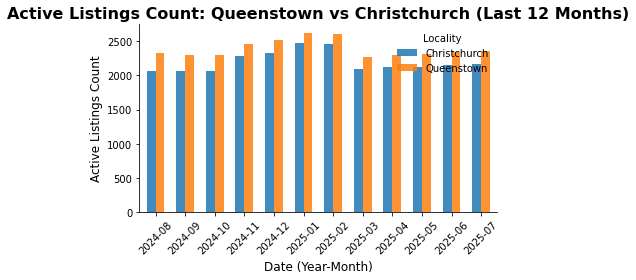

In [6]:

plt.figure(figsize=(12, 6))
df_pivot.plot(kind="bar", width=0.6, alpha=0.85, edgecolor="none")

plt.title("Active Listings Count: Queenstown vs Christchurch (Last 12 Months)", fontsize=16, weight="bold")
plt.xlabel("Date (Year-Month)", fontsize=12)
plt.ylabel("Active Listings Count", fontsize=12)

# remove top and right boarder
for spine in ["top", "right"]:
    plt.gca().spines[spine].set_visible(False)

plt.legend(title="Locality", frameon=False)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

 ### 4.2 Occupancy Rates in Queenstown and Christchurch

This subsection visualizes **occupancy rates** for Queenstown and Christchurch from August 2024 to July 2025, highlighting seasonal trends and differences in Airbnb market demand.

- **Metric**: `occupancy_avg` from `nz_airbnb_all_metrics.csv`, representing the average percentage of booked nights per listing per month.
- **Key Observations**:
  - Both cities exhibit similar seasonal patterns, with occupancy rates peaking during the Christmas season (December–February) at ~65% (e.g., January 2025: Queenstown 68%, Christchurch 60%).
  - Occupancy drops to its lowest in May and June (~40%; e.g., May 2025: Queenstown 39%, Christchurch 41%), reflecting off-season trends.
  - A notable difference occurs in August 2024, where Queenstown sees a secondary peak (~64%) due to winter tourism (e.g., skiing), while Christchurch remains lower (~47%).
- **Interpretation**:
  - **Queenstown**: High occupancy in summer (Dec–Feb) and winter (August) reflects its tourism-driven market, ideal for short-term rentals targeting peak seasons.
  - **Christchurch**: More consistent occupancy year-round suggests a steady urban market, suitable for long-term or risk-averse investments.
---


In [8]:
# Occupancy rate
pivot_occ = qt_chch_filtered.pivot(index="date", columns="locality", values="occupancy_avg")

pivot_occ

locality,Christchurch,Queenstown
date,,
2024-08,0.47,0.64
2024-09,0.50,0.55
2024-10,0.55,0.52
2024-11,0.54,0.54
2024-12,0.61,0.65
2025-01,0.60,0.68
2025-02,0.67,0.66
2025-03,0.60,0.60
2025-04,0.57,0.59


<Figure size 864x432 with 0 Axes>

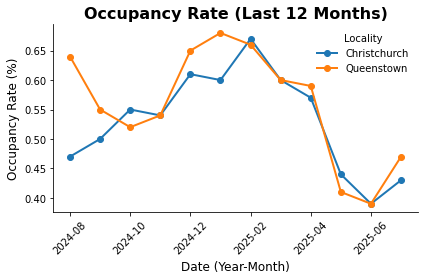

In [14]:



plt.figure(figsize=(12,6))
pivot_occ.plot(marker="o", linewidth=2)

plt.title("Occupancy Rate (Last 12 Months)", fontsize=16, weight="bold")
plt.xlabel("Date (Year-Month)", fontsize=12)
plt.ylabel("Occupancy Rate (%)", fontsize=12)


for spine in ["top", "right"]:
    plt.gca().spines[spine].set_visible(False)

plt.legend(title="Locality", frameon=False)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

### 4.3 Average Daily Rate (ADR) in Queenstown and Christchurch

This subsection visualizes the **Average Daily Rate (ADR)** for Queenstown and Christchurch from August 2024 to July 2025, highlighting pricing trends and seasonal differences in Airbnb market performance.

- **Metric**: `average_daily_rate_avg` from `nz_airbnb_all_metrics.csv`, representing the average price per booked night per listing per month (in NZD).
- **Key Observations**:
  - **Queenstown** shows clear seasonality: ADR peaks during the Christmas season (December–February, e.g., NZD 648.2 in January 2025) and winter (e.g., NZD 624.7 in August 2024), driven by tourism demand, while May is the cheapest month (e.g., NZD 487.3 in May 2025).
  - **Christchurch** maintains relatively stable ADR throughout the year, with minor fluctuations (e.g., NZD 222.9 in January 2025, NZD 175.5 in Sep 2024).
  - The gap between the most and least expensive months is NZD 160.9 in Queenstown (January vs. May 2025) versus only NZD 47.4 in Christchurch (January vs. May 2025), reflecting Queenstown’s dynamic pricing.
- **Interpretation**:
  - **Queenstown**: High ADR during summer and winter (e.g., NZD 648.2 in January) makes it attractive for short-term rentals targeting peak seasons, but low months (e.g., May) require strategic pricing.
  - **Christchurch**: Stable ADR (e.g., NZD 175.5–222.9) supports consistent revenue, ideal for long-term or risk-averse rental strategies.

---


In [9]:
# ADR
pivot_adr = qt_chch_filtered.pivot(index="date", columns="locality", values="average_daily_rate_avg")

pivot_adr


locality,Christchurch,Queenstown
date,,
2024-08,183.0,624.7
2024-09,175.5,552.6
2024-10,177.5,521.9
2024-11,208.5,569.9
2024-12,219.2,627.1
2025-01,222.9,648.2
2025-02,212.3,589.1
2025-03,206.9,568.4
2025-04,201.5,549.1


<Figure size 864x432 with 0 Axes>

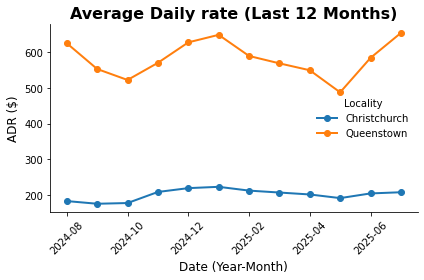

In [16]:
plt.figure(figsize=(12,6))
pivot_adr.plot(marker="o", linewidth=2)

plt.title("Average Daily rate (Last 12 Months)", fontsize=16, weight="bold")
plt.xlabel("Date (Year-Month)", fontsize=12)
plt.ylabel("ADR ($)", fontsize=12)


for spine in ["top", "right"]:
    plt.gca().spines[spine].set_visible(False)

plt.legend(title="Locality", frameon=False)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

### 4.4 Revenue in Queenstown and Christchurch

This subsection visualizes **average monthly revenue** for Queenstown and Christchurch from August 2024 to July 2025, highlighting how revenue trends align with Average Daily Rate (ADR) patterns and seasonal demand in Airbnb markets.

- **Metric**: `revenue_avg` from `nz_airbnb_all_metrics.csv`, representing the average monthly revenue per listing (in NZD).
- **Key Observations**:
  - Revenue trends closely follow ADR patterns, with seasonality driving fluctuations:
    - **Queenstown** exhibits two distinct peak seasons: summer (December–February, e.g., NZD 13,392 in January 2025) and winter (e.g., NZD 12,284 in August 2024), fueled by tourism demand.
    - Queenstown’s peak-season revenue is approximately 125% higher than off-peak months (e.g., January 2025: NZD 13,392 vs. May 2025: NZD 5,966, a 125.4% increase).
    - **Christchurch** shows relatively stable revenue, with milder fluctuations (e.g., NZD 4,129 in January 2025 vs. NZD 2,371 in June 2025). Peak-season revenue is about 80% higher than the lowest month (June, 79.8% increase).
- **Interpretation**:
  - **Queenstown**: Dual peaks (summer and winter) make it ideal for short-term rentals targeting high-demand periods, but off-peak months require strategic pricing or diversification.
  - **Christchurch**: Stable revenue (e.g., NZD 2,296–4,129) supports consistent returns, suitable for long-term or risk-averse rental strategies.

---



In [10]:
# Revenue
pivot_revenue = qt_chch_filtered.pivot(index="date", columns="locality", values="revenue_avg")

pivot_revenue

locality,Christchurch,Queenstown
date,,
2024-08,2705.0,12284.3
2024-09,2584.8,8792.6
2024-10,3052.2,7960.4
2024-11,3410.5,8706.6
2024-12,4248.2,12450.7
2025-01,4129.2,13392.4
2025-02,4002.7,10204.7
2025-03,3805.0,9810.2
2025-04,3446.9,9492.0


<Figure size 864x432 with 0 Axes>

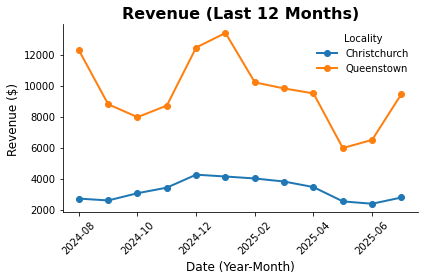

In [17]:

plt.figure(figsize=(12,6))
pivot_revenue.plot(marker="o", linewidth=2)

plt.title("Revenue (Last 12 Months)", fontsize=16, weight="bold")
plt.xlabel("Date (Year-Month)", fontsize=12)
plt.ylabel("Revenue ($)", fontsize=12)


for spine in ["top", "right"]:
    plt.gca().spines[spine].set_visible(False)

plt.legend(title="Locality", frameon=False)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## 4.5 Revenue-to-House-Price Ratio Analysis

This section calculates and visualizes the **revenue-to-median house price ratio** to assess ROI potential for Airbnb rentals in Queenstown and Christchurch over the last 12 months.

- **Methodology**:
  - Use hardcoded median house prices: Queenstown (NZD 1.85M), Christchurch (NZD 0.7M).
  - Compute ratio as `revenue_avg / house_price` for each city and month.
  - Pivot data to compare cities over time.
- **Visualization**: A line plot shows trends in the ratio, highlighting ROI differences.
- **Assumptions**: House prices are static estimates; actual ROI should include costs like maintenance, taxes, and fees.

### Interpretation of Revenue-to-Price Ratio Plot
- **Key Trends**: Queenstown’s ratio peaks in summer (e.g., ~0.007 in January 2025), reflecting high tourism-driven revenue. Christchurch’s ratio is lower (~0.006) and more stable, indicating consistent urban demand.
- **Insights**: Queenstown offers higher ROI potential for short-term rentals, especially in peak seasons, but its high property costs require larger investments. Christchurch is better for stable, lower-yield rentals.
- **Limitations**: The analysis uses average revenue and static house prices. Real-world ROI varies with operational costs and market fluctuations.

---

<Figure size 864x432 with 0 Axes>

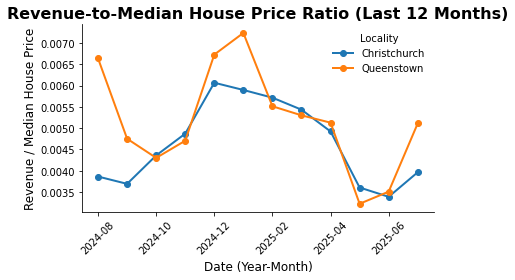

In [18]:
# define medium house price for QT and CHCH
house_price = {
    "Queenstown": 1_850_000,  # 1.85 million
    "Christchurch": 700_000   # 0.7 million
}

# copy table to avoid edit the raw data
df_ratio = qt_chch_filtered.copy()

# calculate revenue / house price
df_ratio["revenue_to_price"] = df_ratio.apply(
    lambda row: row["revenue_avg"] / house_price.get(row["locality"], 1),
    axis=1
)

pivot_rev_ratio = df_ratio.pivot(index="date", columns="locality", values="revenue_to_price")


plt.figure(figsize=(12,6))
pivot_rev_ratio.plot(marker="o", linewidth=2)

plt.title("Revenue-to-Median House Price Ratio (Last 12 Months)", fontsize=16, weight="bold")
plt.xlabel("Date (Year-Month)", fontsize=12)
plt.ylabel("Revenue / Median House Price", fontsize=12)

for spine in ["top", "right"]:
    plt.gca().spines[spine].set_visible(False)

plt.legend(title="Locality", frameon=False)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


## 5. Conclusion and Key Takeaways

This notebook analyzes Airbnb market performance in Queenstown and Christchurch (August 2024–July 2025) using AirROI API data:

- **Performance Comparison**:
  - **Queenstown**: Excels in revenue efficiency, with average monthly revenue of ~NZD 13,392 per listing in January 2025 (RevPAR: NZD 432) and a high revenue-to-price ratio (~0.0072). Its tourism-driven market drives seasonal spikes.
  - **Christchurch**: Offers stable but lower returns, with ~NZD 4,129 revenue per listing in January 2025 (RevPAR: NZD 133.2) and a ratio of ~0.0059, reflecting consistent urban demand.
- **Investment Insights**:
  - Queenstown is ideal for high-yield, short-term rentals but requires a NZD 1.85M median investment. Peak seasons (Dec–Feb, August) maximize returns.
  - Christchurch (NZD 0.7M median price) suits investors seeking steady, lower-risk income with less seasonality.
- **Market Dynamics**:
  - Queenstown’s higher occupancy (e.g., 68% in Jan 2025) and ADR (NZD 581) reflect strong tourist demand.
  - Christchurch’s moderate occupancy (60%) and ADR (NZD 185) indicate a balanced market.
- **Limitations**:
  - Analysis uses static house prices (REINZ, 2025) and excludes costs like taxes, maintenance, or platform fees.
  - Data is aggregated; individual listings may vary significantly.
- **Future Enhancements**:
  - Incorporate additional NZ cities (e.g., Auckland, Wellington) for broader comparison.
  - Integrate dynamic house price data via APIs (e.g., REINZ or Stats NZ).
  - Develop predictive models (e.g., time-series forecasting) or a Streamlit app for interactive dashboards.
- **Takeaway**: Queenstown is a high-reward market for short-term rentals, while Christchurch offers stability. Investors should weigh capital costs and risk tolerance.
